<a href="https://colab.research.google.com/github/IsaacFigNewton/SMIED/blob/main/SMIED_Test_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get, import dependencies

In [1]:
!pip install git+https://github.com/IsaacFigNewton/SMIED.git
# !pip install -e .
!python -m spacy download en_core_web_lg

  Cloning https://github.com/IsaacFigNewton/SMIED.git to /tmp/pip-req-build-l7sy3skw
  Running command git clone --filter=blob:none --quiet https://github.com/IsaacFigNewton/SMIED.git /tmp/pip-req-build-l7sy3skw
  Resolved https://github.com/IsaacFigNewton/SMIED.git to commit 6b57c8aba3ada320d301918c4ec5ea60e565c394
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
^C


# Config

In [1]:
import json
import spacy
from spacy import displacy
import networkx as nx
from smied import SemanticMetagraph, PatternMatcher

In [17]:
nlp = spacy.load('en_core_web_lg')
text = "The quick brown fox jumps over the lazy dog."

# Construct a dependency KG from the SpaCy token info
See [RDF schema spec docs](https://www.w3.org/TR/rdf-schema/) for edge relation guidance

In [18]:
G = SemanticMetagraph(nlp(text))
matcher = PatternMatcher(G)

## Visualize the KG

/usr/local/lib/python3.12/dist-packages/smied/SemanticMetagraph.py:260: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


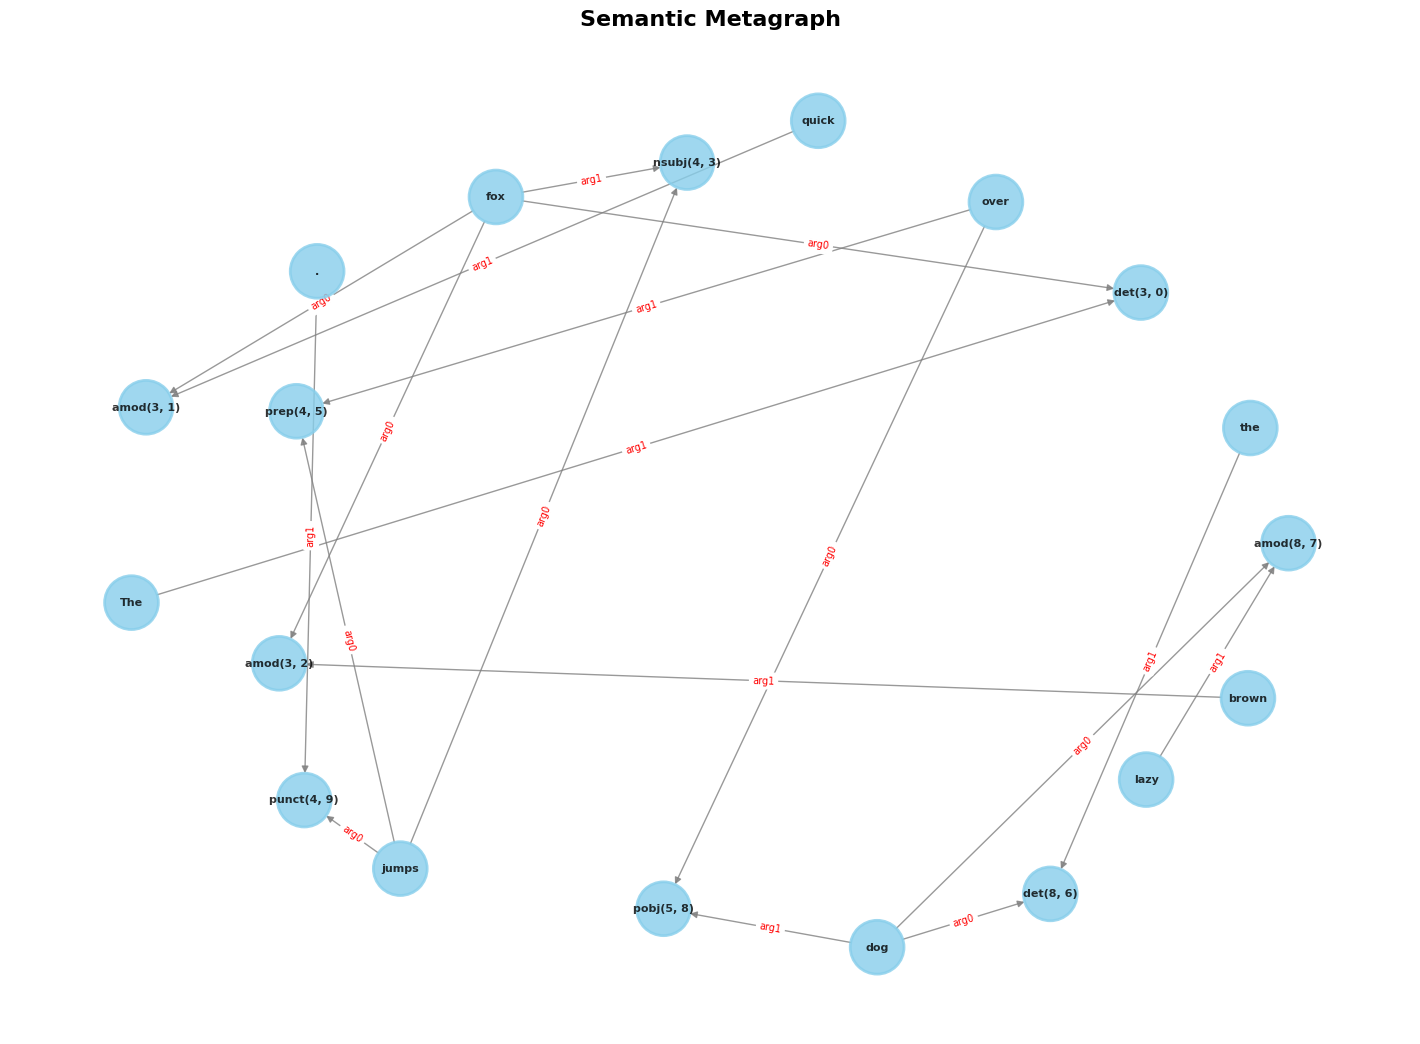

In [4]:
G.plot()

## List nodes, edges

In [5]:
G_json = G.to_json()
print("metaverts")
print(G_json['metaverts'])

metaverts
[
    {
        "id": 0,
        "type": "atomic",
        "value": "The",
        "metadata": {
            "text": "The",
            "pos": "DET",
            "head": 3,
            "lemma": "the",
            "idx": 0,
            "case": "title",
            "type": "word",
            "Definite": [
                "Def"
            ],
            "PronType": [
                "Art"
            ]
        }
    },
    {
        "id": 1,
        "type": "atomic",
        "value": "quick",
        "metadata": {
            "text": "quick",
            "pos": "ADJ",
            "head": 3,
            "lemma": "quick",
            "idx": 1,
            "case": "lower",
            "type": "word",
            "Degree": [
                "Pos"
            ]
        }
    },
    {
        "id": 2,
        "type": "atomic",
        "value": "brown",
        "metadata": {
            "text": "brown",
            "pos": "ADJ",
            "head": 3,
            "lemma": "brown",
  

## Structural analytics

In [6]:
# Test metavertex pattern matching
print("=== Metavertex Structure Analysis ===")

analysis = matcher.analyze_metavertex_patterns()
print(f"Total metavertices: {analysis['total_metaverts']}")
print(f"Atomic count: {analysis['atomic_count']}")
print(f"Directed relations: {analysis['directed_relation_count']}")
print(f"Relation types: {analysis['relation_types']}")
print(f"POS distribution: {analysis['pos_distribution']}")
print()

# Additional metavertex analysis and pattern testing
print("=== Finding Specific Metavertex Types ===")

# Find atomic metavertices with specific POS tags
nouns = matcher.find_atomic_metavertices(pos="NOUN")
print(f"Found {len(nouns)} NOUN metavertices: {nouns}")

verbs = matcher.find_atomic_metavertices(pos="VERB")
print(f"Found {len(verbs)} VERB metavertices: {verbs}")

# Find relation metavertices
nsubj_relations = matcher.find_relation_metavertices(relation_type="nsubj")
print(f"Found {len(nsubj_relations)} nsubj relations: {nsubj_relations}")

dobj_relations = matcher.find_relation_metavertices(relation_type="dobj")
print(f"Found {len(dobj_relations)} dobj relations: {dobj_relations}")

print("\n=== Metavertex Chains ===")
# Get chains starting from first atomic metavertex
if nouns:
    chains = matcher.get_metavertex_chain(nouns[0], max_depth=2)
    print(f"Chains starting from metavertex {nouns[0]}: {chains}")

print("\n=== Detailed Metavertex Structure ===")
print("Metavertices:")
for i, mv in G.metaverts.items():
    mv_content, mv_metadata = mv if len(mv) == 2 else (mv[0], {})
    print(f"  {i}: {mv_content} | {mv_metadata}")

=== Metavertex Structure Analysis ===
Total metavertices: 19
Atomic count: 10
Directed relations: 9
Relation types: {'det': 2, 'amod': 3, 'nsubj': 1, 'prep': 1, 'punct': 1, 'pobj': 1}
POS distribution: {'DET': 2, 'ADJ': 3, 'PROPN': 1, 'VERB': 1, 'ADP': 1, 'NOUN': 1, 'PUNCT': 1}

=== Finding Specific Metavertex Types ===
Found 1 NOUN metavertices: [8]
Found 1 VERB metavertices: [4]
Found 1 nsubj relations: [13]
Found 0 dobj relations: []

=== Metavertex Chains ===
Chains starting from metavertex 8: [[8, 16], [8, 17], [8, 18]]

=== Detailed Metavertex Structure ===
Metavertices:
  0: The | {'text': 'The', 'pos': 'DET', 'head': 3, 'lemma': 'the', 'idx': 0, 'case': 'title', 'type': 'word', 'Definite': ['Def'], 'PronType': ['Art']}
  1: quick | {'text': 'quick', 'pos': 'ADJ', 'head': 3, 'lemma': 'quick', 'idx': 1, 'case': 'lower', 'type': 'word', 'Degree': ['Pos']}
  2: brown | {'text': 'brown', 'pos': 'ADJ', 'head': 3, 'lemma': 'brown', 'idx': 2, 'case': 'lower', 'type': 'word', 'Degree': 

# Try modifying matcher pattern list

## List the default patterns (ensure they loaded correctly)

In [7]:
print(json.dumps(matcher.pattern_loader.patterns, indent=4))

{
    "lexical": {
        "passive_voice": {
            "description": "Find passive voice constructions",
            "pattern": [
                {
                    "mv_type": "atomic",
                    "pos": [
                        "NOUN",
                        "PROPN"
                    ]
                },
                {
                    "mv_type": "directed_relation",
                    "relation_type": "nsubjpass",
                    "requires_reference": true
                },
                {
                    "mv_type": "atomic",
                    "pos": [
                        "VERB"
                    ]
                }
            ]
        },
        "compound_predicate": {
            "description": "Find compound predicates",
            "pattern": [
                {
                    "mv_type": "atomic",
                    "pos": [
                        "NOUN",
                        "PROPN"
                    ]
                }

## Try adding a new pattern to the list for matching

In [8]:
# Updated pattern using new metavertex format
pattern = {
    "name": "test_metavertex_pattern",
    "pattern": [
        {"mv_type": "atomic", "pos": ["NOUN", "PROPN"]},
        {"mv_type": "directed_relation", "relation_type": "nsubj", "requires_reference": True},
        {"mv_type": "atomic", "pos": ["VERB"]}
    ]
}
matcher.add_pattern(
    name=pattern["name"],
    pattern=pattern["pattern"],
    description="A test metavertex pattern for matching subject-verb relationships",
    category="custom"
)

In [9]:
test_pattern_as_string = json.dumps(
    matcher.pattern_loader.patterns["custom"],
    indent=4,
    default=str
)
print(test_pattern_as_string)

{
    "test_metavertex_pattern": {
        "description": "A test metavertex pattern for matching subject-verb relationships",
        "pattern": [
            {
                "mv_type": "atomic",
                "pos": [
                    "NOUN",
                    "PROPN"
                ]
            },
            {
                "mv_type": "directed_relation",
                "relation_type": "nsubj",
                "requires_reference": true
            },
            {
                "mv_type": "atomic",
                "pos": [
                    "VERB"
                ]
            }
        ]
    }
}


# Attempt path matching on semantic KG

## SpaCy dependency parse tree

In [11]:
displacy.render(nlp(text), style="dep", jupyter=True)

## Apply matcher

In [19]:
print("=== All Pattern Summary ===")
all_matches = matcher.get_pattern_summary()

=== All Pattern Summary ===
Found 2 matches for metavertex_basic.atomic_noun:
	Description: Find atomic metavertices containing nouns
	Pattern: [{'mv_type': 'atomic', 'pos': ['NOUN', 'PROPN']}]
	{'indices': [3], 'metaverts': [('fox', {'text': 'fox', 'pos': 'PROPN', 'head': 4, 'lemma': 'fox', 'idx': 3, 'case': 'lower', 'type': 'word', 'Number': ['Sing']})], 'summary': 'fox'}
	{'indices': [8], 'metaverts': [('dog', {'text': 'dog', 'pos': 'NOUN', 'head': 5, 'lemma': 'dog', 'idx': 8, 'case': 'lower', 'type': 'word', 'Number': ['Sing']})], 'summary': 'dog'}

Found 1 matches for metavertex_basic.atomic_verb:
	Description: Find atomic metavertices containing verbs
	Pattern: [{'mv_type': 'atomic', 'pos': ['VERB', 'AUX']}]
	{'indices': [4], 'metaverts': [('jumps', {'text': 'jumps', 'pos': 'VERB', 'head': 4, 'lemma': 'jump', 'idx': 4, 'case': 'lower', 'type': 'word', 'Number': ['Sing'], 'Person': ['3'], 'Tense': ['Pres'], 'VerbForm': ['Fin']})], 'summary': 'jumps'}

Found 9 matches for metaverte

### List JSON for all pattern matches

In [20]:
print(json.dumps(all_matches, indent=4))

{
    "lexical": {
        "passive_voice": [],
        "compound_predicate": [],
        "relative_clause": [],
        "adverbial_modifier": [],
        "prepositional_phrase": []
    },
    "simple_semantic": {
        "causality": [],
        "temporal_sequence": [],
        "quality_attribution": [],
        "spatial_location": [],
        "entity_classification": [],
        "quantified_entity": [],
        "agent_action_patient": []
    },
    "complex_semantic": {
        "ditransitive_action": [],
        "complement_clause": [],
        "transfer_event": [],
        "causal_chain": [],
        "complex_predicate_structure": [],
        "hierarchical_relation": []
    },
    "domain_specific": {
        "medical_diagnosis": [],
        "business_transaction": [],
        "scientific_observation": [],
        "legal_action": [],
        "educational_process": []
    },
    "metavertex_basic": {
        "atomic_noun": [
            {
                "indices": [
                

## Try custom pattern

In [15]:
print("=== Testing Custom Metavertex Pattern ===")
custom_matches = matcher("custom", "test_metavertex_pattern")
print(f"Found {len(custom_matches)} custom pattern matches:")
for match in custom_matches:
    print(f"  {match}")
print()

=== Testing Custom Metavertex Pattern ===
Found 0 custom pattern matches:

